In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

In [2]:
clean_df = pd.read_csv('../data/processed/processed_data.csv')
clean_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,1


## Making questions:

**Question 1:** Based on this dataset, How can we learn the general knowledge of stroke?

**Purpose of this question:** Give us general knowledge about stroke.

**How we can answer this question:** 

Step 1: We will represent the proportion and number of people who suffered from `Stroke` by using pie and bar chart. It will help us have a general view of this dataset.

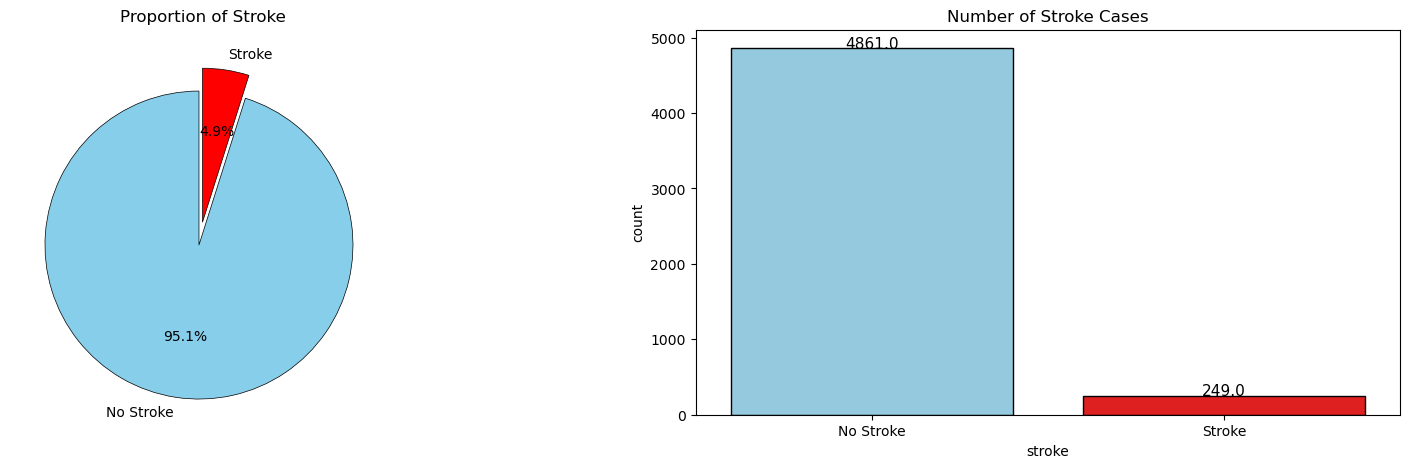

In [3]:
cross_tab = clean_df['stroke'].value_counts()
proportion = (cross_tab / len(clean_df) * 100).to_numpy()
colors = ['skyblue', 'red']

fig = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

plt.subplot(1,2,1)
plt.pie(proportion,labels=['No Stroke', 'Stroke'],autopct='%1.1f%%',startangle=90,explode=(0.15,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
plt.title('Proportion of Stroke')

plt.subplot(1,2,2)
ax = sns.countplot(data=clean_df,x='stroke',palette=colors,edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Stroke','Stroke'])
plt.title('Number of Stroke Cases');
plt.show()

Step 2: we will show some means of each numeric columns by using `pd.describe()` and transpose it to easily extract this information

In [4]:
stroke_df, none_stroke_df = clean_df[clean_df['stroke'] == 1].describe().T, clean_df[clean_df['stroke'] == 0].describe().T

Step 3: we will visualize the information above for everyone can understand as well as observe it much more easily.

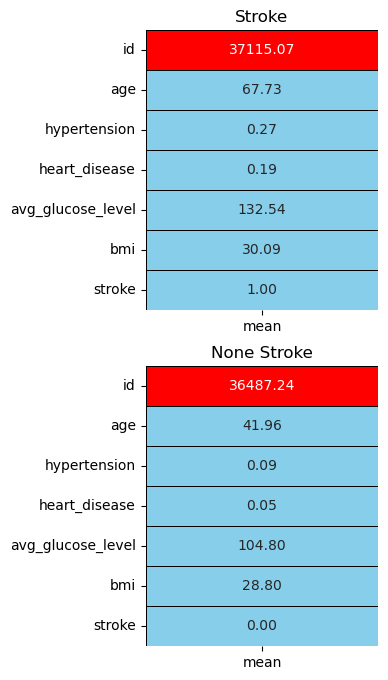

In [5]:
colors = ['skyblue','red']
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(3,8))

plt.subplot(2,1,1)
sns.heatmap(stroke_df[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke')

plt.subplot(2,1,2)
sns.heatmap(none_stroke_df[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('None Stroke');

**Observation**:

Step 3: Next, we will create a dataframe of people who suffered from `Stroke` to analyze it more deeply.

In [6]:
stroke_df = clean_df[clean_df['stroke'] == 1]

In [7]:
clean_df['age_group'] = pd.cut(clean_df['age'], bins=[0,20,40,60,100],labels=['0-20','21-40','41-60','61-100'])
clean_df = clean_df[clean_df['gender'] != 'Other']
clean_df['gender_age_group'] = clean_df['gender'].astype(str) + '_' + clean_df['age_group'].astype(str)
clean_df = clean_df.loc[clean_df['age_group'].notna(),:]
cross_tab = pd.crosstab(clean_df['gender_age_group'],clean_df['stroke'])
probability = cross_tab.div(cross_tab.sum(axis=1),axis=0)
female_props = probability.loc[probability.index.str.startswith('F'), :]
male_props = probability.loc[probability.index.str.startswith('M'), :]
female_props, male_props

(stroke                   0         1
 gender_age_group                    
 Female_0-20       0.996024  0.003976
 Female_21-40      0.992509  0.007491
 Female_41-60      0.962801  0.037199
 Female_61-100     0.869908  0.130092,
 stroke                   0         1
 gender_age_group                    
 Male_0-20         1.000000  0.000000
 Male_21-40        1.000000  0.000000
 Male_41-60        0.953704  0.046296
 Male_61-100       0.856354  0.143646)

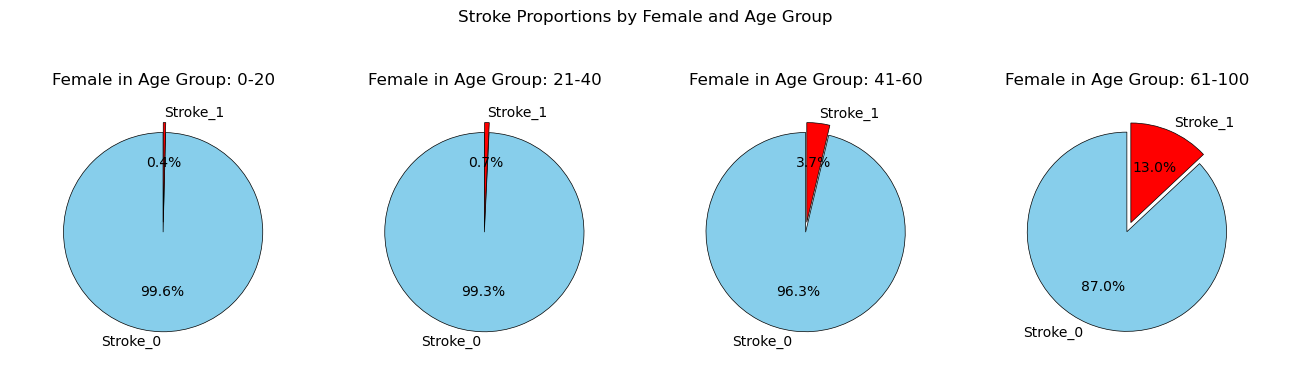

In [8]:
age_groups = ['0-20', '21-40', '41-60', '61-100']
fig, ax = plt.subplots(nrows=1,ncols=len(female_props.values),figsize=(13, 3.5))
plt.suptitle('Stroke Proportions by Female and Age Group', y=1.05)

for i, row in enumerate(female_props.values):
    ax[i].pie(row,labels=['Stroke_0', 'Stroke_1'],colors=colors,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True},explode=(0.1,0))
    ax[i].set_title(f'Female in Age Group: {age_groups[i]}')
    ax[i].axis('equal')

plt.tight_layout()
plt.show()

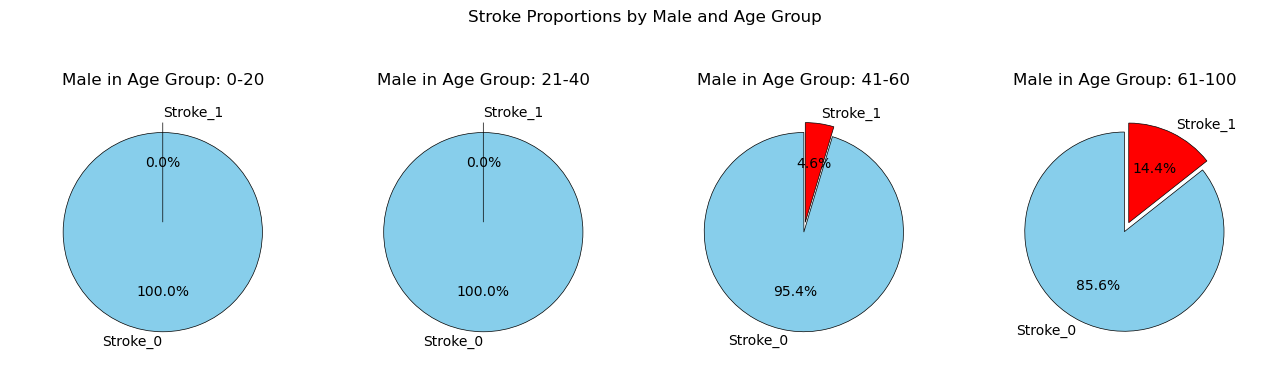

In [9]:
age_groups = ['0-20', '21-40', '41-60', '61-100']
fig, ax = plt.subplots(nrows=1,ncols=len(male_props.values),figsize=(13, 3.5))
plt.suptitle('Stroke Proportions by Male and Age Group', y=1.05)

for i, row in enumerate(male_props.values):
    ax[i].pie(row,labels=['Stroke_0', 'Stroke_1'],colors=colors,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True},explode=(0.1,0))
    ax[i].set_title(f'Male in Age Group: {age_groups[i]}')
    ax[i].axis('equal')

plt.tight_layout()
plt.show()

In [10]:
gender_prop = (stroke_df['gender'].value_counts() / len(stroke_df) * 100).to_numpy()
hypertension_prop = (stroke_df['hypertension'].value_counts() / len(stroke_df) * 100).to_numpy()
heart_disease_prop = (stroke_df['heart_disease'].value_counts() / len(stroke_df) * 100).to_numpy()
married_prop = (stroke_df['ever_married'].value_counts() / len(stroke_df) * 100).to_numpy()
work_type_prop = (stroke_df['work_type'].value_counts() / len(stroke_df) * 100).to_numpy()
residence_prop = (stroke_df['Residence_type'].value_counts() / len(stroke_df) * 100).to_numpy()
proportions = [gender_prop,hypertension_prop,heart_disease_prop,married_prop,work_type_prop,residence_prop]
proportions

[array([56.62650602, 43.37349398]),
 array([73.4939759, 26.5060241]),
 array([81.12449799, 18.87550201]),
 array([88.35341365, 11.64658635]),
 array([59.83935743, 26.10441767, 13.25301205,  0.80321285]),
 array([54.21686747, 45.78313253])]

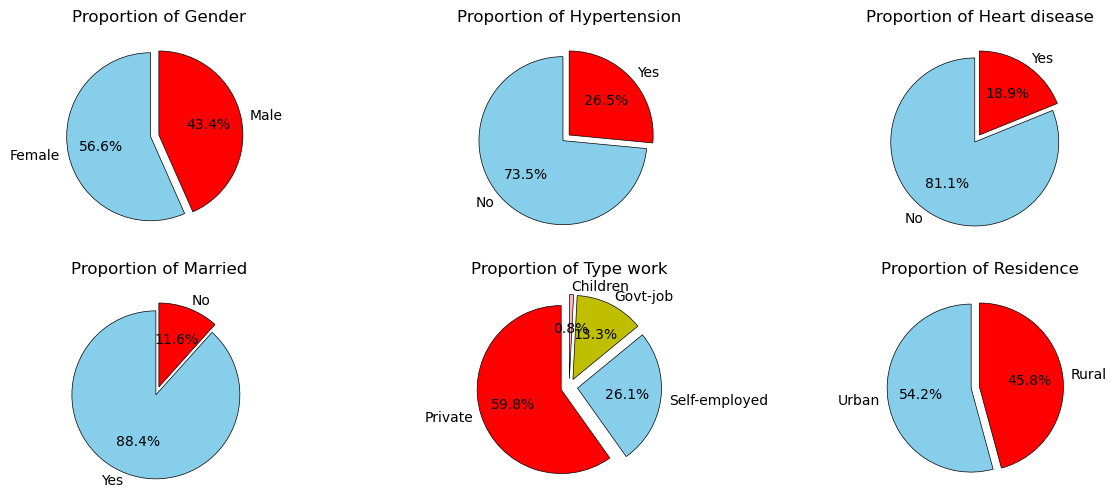

In [11]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,6))

ax[0,0].pie(proportions[0],labels=['Female', 'Male'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[0,0].set_title('Proportion of Gender')

ax[0,1].pie(proportions[1],labels=['No', 'Yes'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[0,1].set_title('Proportion of Hypertension')

ax[0,2].pie(proportions[2],labels=['No', 'Yes'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[0,2].set_title('Proportion of Heart disease')

ax[1,0].pie(proportions[3],labels=['Yes', 'No'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[1,0].set_title('Proportion of Married')

ax[1,1].pie(proportions[4],labels=['Private', 'Self-employed','Govt-job','Children'],autopct='%1.1f%%',startangle=90,explode=(0.1,0.1,0.1,0.1),colors=['r','skyblue','y','lightpink'],wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[1,1].set_title('Proportion of Type work')

ax[1,2].pie(proportions[5],labels=['Urban', 'Rural'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[1,2].set_title('Proportion of Residence');

**Question 2:** How can we predict a person if he/she can get stroke? 

**Answer this question will help**

**How we can answer this question**

In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5066 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5066 non-null   int64   
 1   gender             5066 non-null   object  
 2   age                5066 non-null   int64   
 3   hypertension       5066 non-null   int64   
 4   heart_disease      5066 non-null   int64   
 5   ever_married       5066 non-null   object  
 6   work_type          5066 non-null   object  
 7   Residence_type     5066 non-null   object  
 8   avg_glucose_level  5066 non-null   float64 
 9   bmi                5066 non-null   float64 
 10  stroke             5066 non-null   int64   
 11  age_group          5066 non-null   category
 12  gender_age_group   5066 non-null   object  
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 519.7+ KB


In [13]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.preprocessing
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")

In [14]:
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
clean_df['bmi_group'] = pd.cut(clean_df['bmi'], bins=bins, labels=labels)

In [15]:
bins = [0, 140, 200, float('inf')]
labels = ['Normal', 'Prediabetes', 'Diabetes']
clean_df['avg_glucose_level_group'] = pd.cut(clean_df['avg_glucose_level'], bins=bins, labels=labels)

In [16]:
clean_df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,age_group,gender_age_group,bmi_group,avg_glucose_level_group
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,1,61-100,Male_61-100,Obese,Diabetes
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,1,61-100,Female_61-100,Overweight,Diabetes
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,1,61-100,Male_61-100,Obese,Normal


In [17]:
feature_selected = clean_df.drop(columns=['id', 'age', 'gender', 'age_group', 'bmi', 'avg_glucose_level'])
feature_selected = feature_selected.reindex(columns=['hypertension', 'heart_disease',  'gender_age_group','ever_married', 'work_type', 'Residence_type','bmi_group','avg_glucose_level_group', 'stroke'])

In [18]:
feature_selected.head(3)

,hypertension,heart_disease,gender_age_group,ever_married,work_type,Residence_type,bmi_group,avg_glucose_level_group,stroke
0,0,1,Male_61-100,Yes,Private,Urban,Obese,Diabetes,1
1,0,0,Female_61-100,Yes,Self-employed,Rural,Overweight,Diabetes,1
2,0,1,Male_61-100,Yes,Private,Rural,Obese,Normal,1


In [19]:
label_encoder = sklearn.preprocessing.LabelEncoder()
for col in feature_selected.columns:
    feature_selected[col] = label_encoder.fit_transform(feature_selected[col])

In [20]:
feature_selected

,hypertension,heart_disease,gender_age_group,ever_married,work_type,Residence_type,bmi_group,avg_glucose_level_group,stroke
0,0,1,7,1,2,1,1,0,1
1,0,0,3,1,3,0,2,0,1
2,0,1,7,1,2,0,1,1,1
3,0,0,2,1,2,1,1,2,1
4,1,0,3,1,3,0,0,2,1
...,...,...,...,...,...,...,...,...,...
5105,1,0,3,1,2,1,2,1,0
5106,0,0,3,1,3,1,1,1,0
5107,0,0,1,1,3,0,1,1,0
5108,0,0,6,1,2,0,2,2,0


In [21]:
train_sample, test_sample = feature_selected.iloc[:round(feature_selected.shape[0] * 0.8), :], feature_selected.iloc[round(feature_selected.shape[0] * 0.8):,:]

In [22]:
print(f'Train_sample: {train_sample.shape}')
print(f'Test sample: {test_sample.shape}')

Train_sample: (4053, 9)
Test sample: (1013, 9)


In [23]:
def getTrainValSample(data, fold):
    begin_pos = round(data.shape[0] * fold / 10)
    length = round(data.shape[0] * 1 / 10)

    train = pd.concat([data.iloc[0:begin_pos, :], data.iloc[begin_pos+length:, :]]).to_numpy()
    val = data.iloc[begin_pos: begin_pos+length,:].to_numpy()

    x_train, y_train = train[:, :-1], train[:, -1]
    x_val, y_val = val[:, :-1], val[:, -1]
    return (x_train, y_train), (x_val, y_val)

In [24]:
train_errors_decision_tree = []
val_errors_decision_tree = []
for i in range(10):
    train, val = getTrainValSample(train_sample, i)
    model = DecisionTreeClassifier(criterion="entropy")
    model.fit(train[0], train[1])
    train_errors_decision_tree.append(model.score(train[0], train[1]))
    val_errors_decision_tree.append(model.score(val[0], val[1]))
    
decisionModel = pd.DataFrame({'Train Accuracy': train_errors_decision_tree,
                 'Validation Accuracy': val_errors_decision_tree
                 })

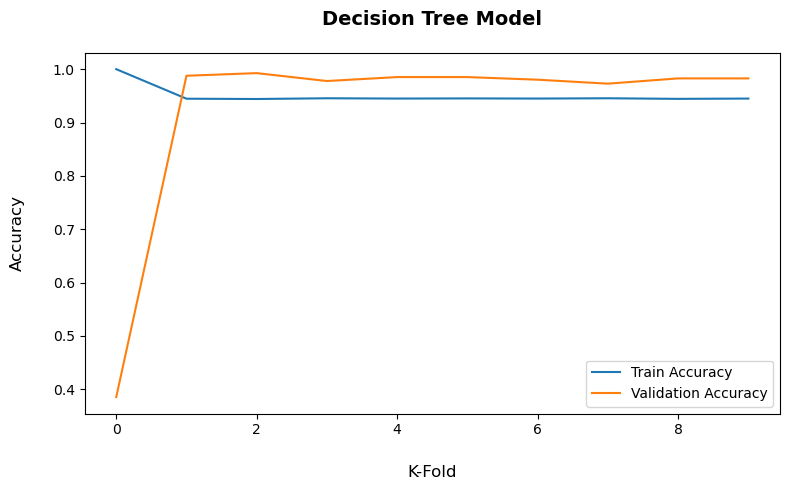

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))

decision_tree_train_line, = ax.plot(decisionModel['Train Accuracy'])
decision_tree_val_line, = ax.plot(decisionModel['Validation Accuracy'])

ax.set_title("Decision Tree Model", fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("K-Fold", fontsize=12, labelpad=20)
ax.set_ylabel("Accuracy", fontsize=12, labelpad=20)
ax.legend([decision_tree_train_line, decision_tree_val_line], decisionModel.columns, loc="best")

plt.tight_layout()
plt.show()

In [26]:
x_train, y_train = train_sample.iloc[:, :-1], train_sample.iloc[:, -1:]
x_test, y_test = test_sample.iloc[:, :-1], test_sample.iloc[:, -1:]
print(f"x_train shape: {x_train.shape}\n"
      f"y_train shape: {y_train.shape}"
      )

x_train shape: (4053, 8)
y_train shape: (4053, 1)


In [27]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)
model.get_depth()

15

In [28]:
y_train_pred = model.predict(x_train)
report = classification_report(y_true=y_train, y_pred=y_train_pred, labels=model.classes_)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3804
           1       0.98      0.18      0.31       249

    accuracy                           0.95      4053
   macro avg       0.96      0.59      0.64      4053
weighted avg       0.95      0.95      0.93      4053



In [29]:
y_pred = model.predict(x_test)
accuracy_predict = accuracy_score(y_test, y_pred)
print(f"accuracy test: {accuracy_predict}")

accuracy test: 0.983218163869694


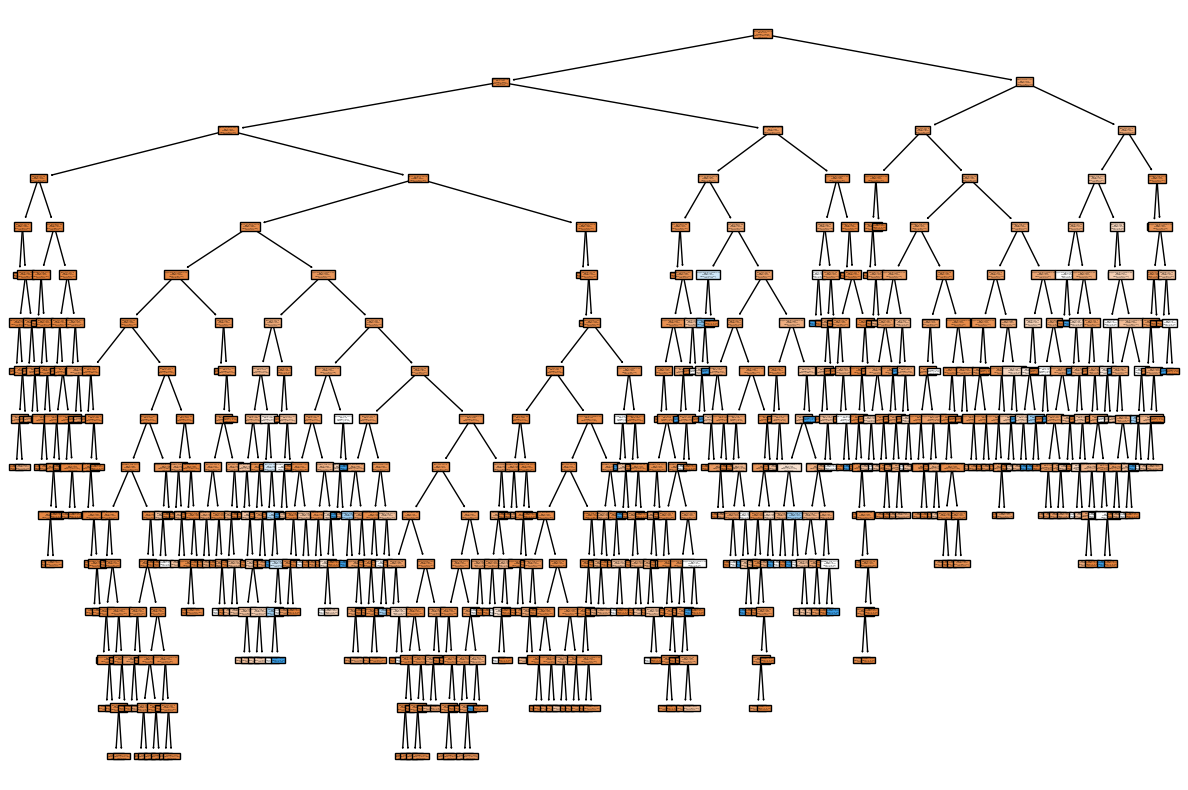

In [30]:
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=feature_selected.columns, class_names=['False', 'True'], proportion=True)
plt.savefig('abc.png')
plt.show()

In [31]:
importances = model.feature_importances_
feature_selected.drop(columns='stroke', inplace=True)
importances_df = pd.DataFrame({
    'Feature': feature_selected.columns,
    'Importance': importances
})
importances_df = round(importances_df.sort_values(by='Importance', ascending=False), 2)
print(importances_df)

                   Feature  Importance
2         gender_age_group        0.20
4                work_type        0.17
6                bmi_group        0.15
7  avg_glucose_level_group        0.15
5           Residence_type        0.12
3             ever_married        0.09
0             hypertension        0.08
1            heart_disease        0.05
